In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
results_path = Path('../../../results/all/experiment_results.csv')
df = pd.read_csv(results_path)

# Filter for real datasets
real_datasets = ['bank_marketing', 'breast_cancer', 'credit_default', 'pima']
df_real = df[df['dataset_id'].isin(real_datasets)]

print(f"Loaded {len(df_real)} real experiments")
print(f"Methods: {df_real['model_name'].unique()}")
print(f"Datasets: {df_real['dataset_id'].unique()}")


Loaded 15 real experiments
Methods: ['nimo']
Datasets: ['breast_cancer' 'pima' 'bank_marketing']


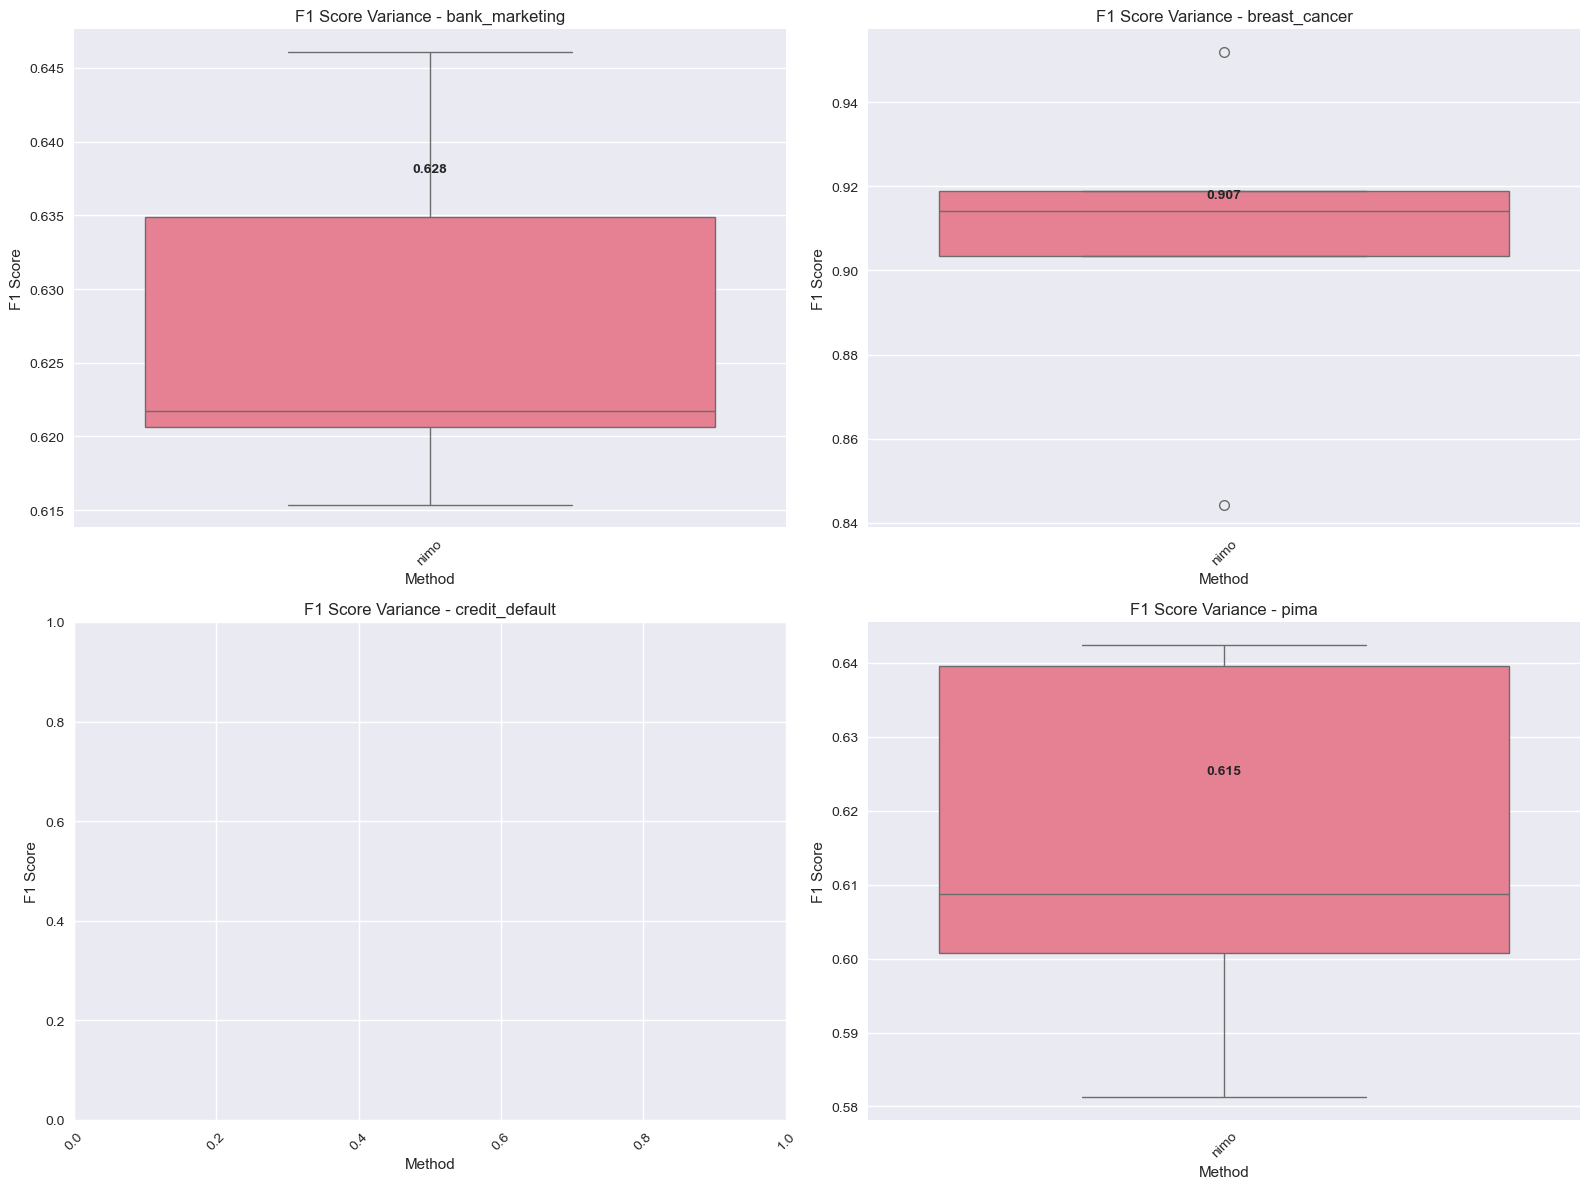

\n=== PERFORMANCE VARIANCE ANALYSIS ===
\nbank_marketing:
              mean     std     min     max
model_name                                
nimo        0.6277  0.0125  0.6154  0.6461
\nbreast_cancer:
              mean     std     min     max
model_name                                
nimo        0.9065  0.0392  0.8443  0.9519
\ncredit_default:
Empty DataFrame
Columns: [mean, std, min, max]
Index: []
\npima:
              mean     std     min     max
model_name                                
nimo        0.6145  0.0262  0.5812  0.6425


In [2]:
# 1. Performance Variance over Iterations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, dataset in enumerate(real_datasets):
    dataset_data = df_real[df_real['dataset_id'] == dataset]
    
    # Create boxplot for F1 scores by method
    sns.boxplot(data=dataset_data, x='model_name', y='f1', ax=axes[i])
    axes[i].set_title(f'F1 Score Variance - {dataset}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('F1 Score')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add mean values as text
    means = dataset_data.groupby('model_name')['f1'].mean()
    for j, (method, mean) in enumerate(means.items()):
        axes[i].text(j, mean + 0.01, f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate variance statistics
print("\\n=== PERFORMANCE VARIANCE ANALYSIS ===")
for dataset in real_datasets:
    dataset_data = df_real[df_real['dataset_id'] == dataset]
    print(f"\\n{dataset}:")
    variance_stats = dataset_data.groupby('model_name')['f1'].agg(['mean', 'std', 'min', 'max']).round(4)
    print(variance_stats)


<Figure size 1500x1000 with 0 Axes>

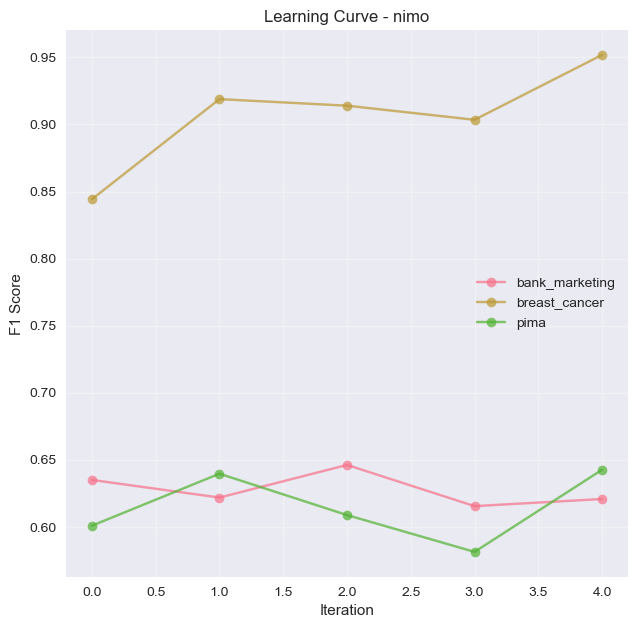

In [3]:
# 2. Learning Curves (Performance vs Iterations)
plt.figure(figsize=(15, 10))

# Create subplots for each method
methods = df_real['model_name'].unique()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, method in enumerate(methods):
    if i < len(axes):
        method_data = df_real[df_real['model_name'] == method]
        
        # Plot F1 score over iterations for each dataset
        for dataset in real_datasets:
            dataset_method_data = method_data[method_data['dataset_id'] == dataset]
            if len(dataset_method_data) > 0:
                # Sort by iteration to get proper learning curve
                dataset_method_data = dataset_method_data.sort_values('iteration')
                axes[i].plot(dataset_method_data['iteration'], dataset_method_data['f1'], 
                           marker='o', label=dataset, alpha=0.7)
        
        axes[i].set_title(f'Learning Curve - {method}')
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel('F1 Score')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(methods), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

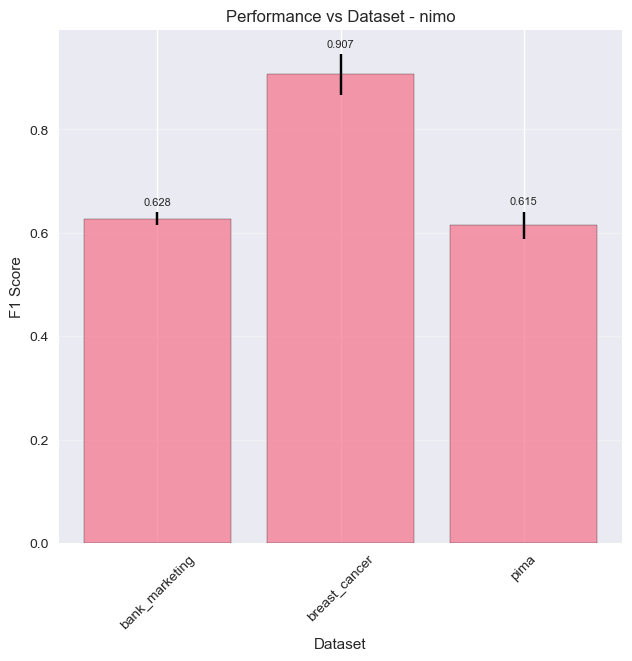

\n=== SENSITIVITY ANALYSIS ===
\nnimo:
  Mean F1: 0.7163
  Std F1: 0.1649
  Min F1: 0.6145
  Max F1: 0.9065
  Range: 0.2920


In [4]:
# 3. Sensitivity Analysis (Performance vs Dataset)
plt.figure(figsize=(15, 10))

# Create subplots for each method
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, method in enumerate(methods):
    if i < len(axes):
        method_data = df_real[df_real['model_name'] == method]
        
        # Calculate mean F1 score for each dataset
        dataset_means = method_data.groupby('dataset_id')['f1'].mean()
        dataset_stds = method_data.groupby('dataset_id')['f1'].std()
        
        # Plot performance vs dataset
        x_pos = range(len(dataset_means))
        bars = axes[i].bar(x_pos, dataset_means.values, yerr=dataset_stds.values, 
                          capsize=5, alpha=0.7, edgecolor='black')
        
        axes[i].set_title(f'Performance vs Dataset - {method}')
        axes[i].set_xlabel('Dataset')
        axes[i].set_ylabel('F1 Score')
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(dataset_means.index, rotation=45)
        axes[i].grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, mean, std in zip(bars, dataset_means.values, dataset_stds.values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
                        f'{mean:.3f}', ha='center', va='bottom', fontsize=8)

# Remove empty subplots
for i in range(len(methods), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()

# Print sensitivity analysis
print("\\n=== SENSITIVITY ANALYSIS ===")
for method in methods:
    method_data = df_real[df_real['model_name'] == method]
    dataset_means = method_data.groupby('dataset_id')['f1'].mean()
    print(f"\\n{method}:")
    print(f"  Mean F1: {dataset_means.mean():.4f}")
    print(f"  Std F1: {dataset_means.std():.4f}")
    print(f"  Min F1: {dataset_means.min():.4f}")
    print(f"  Max F1: {dataset_means.max():.4f}")
    print(f"  Range: {dataset_means.max() - dataset_means.min():.4f}")
